In [39]:
import pandas as pd

df =pd.read_csv("D:/Hassan/PYTHON/Energy Analytics/Important Notes/household_power_consumption.txt", sep=';')
df

C:\Software\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [40]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [41]:
df['Date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

In [51]:
df_global = df[['Date_time', 'Global_active_power']]
df_global

,Date_time,Global_active_power
0,2006-12-16 17:24:00,4.216
1,2006-12-16 17:25:00,5.360
2,2006-12-16 17:26:00,5.374
3,2006-12-16 17:27:00,5.388
4,2006-12-16 17:28:00,3.666
...,...,...
2075254,2010-11-26 20:58:00,0.946
2075255,2010-11-26 20:59:00,0.944
2075256,2010-11-26 21:00:00,0.938
2075257,2010-11-26 21:01:00,0.934


In [52]:
#df = df.drop(['Date','Time'], axis=1)
df_global = df_global.set_index('Date_time')
df_global = df_global.replace('?', np.nan)

In [53]:
df_global =df_global.fillna(method ='bfill')


In [14]:
# for col in df:
#     df[col] = df[col].astype('float')

In [55]:
df_global['Global_active_power'] = df_global['Global_active_power'].astype('float')

In [56]:
df_global = df_global.resample('H', axis =0).sum()
df_global

,Global_active_power
Date_time,
2006-12-16 17:00:00,152.024
2006-12-16 18:00:00,217.932
2006-12-16 19:00:00,204.014
2006-12-16 20:00:00,196.114
2006-12-16 21:00:00,183.388
...,...
2010-12-11 19:00:00,143.518
2010-12-11 20:00:00,105.200
2010-12-11 21:00:00,66.894


In [57]:
df_global['hourly'] = df_global.index.hour
df_global.index = df_global.index.date

In [58]:
# df_ten_mean = df_hourly.pivot_table(columns ='hourly')
# # for 10 years, you get mean values for each hour

In [65]:
df_global

,Global_active_power,hourly
2006-12-16,152.024,17
2006-12-16,217.932,18
2006-12-16,204.014,19
2006-12-16,196.114,20
2006-12-16,183.388,21
...,...,...
2010-12-11,143.518,19
2010-12-11,105.200,20
2010-12-11,66.894,21
2010-12-11,19.232,22


In [59]:
# plt.style.use('seaborn')
# df_ten_mean.T.plot(figsize=(13,8), legend=True, color='blue', alpha =0.25)

In [ ]:
# df_global['Hour']= df_hourly['hourly']
# df_global_pivot = df_global.pivot_table(columns ='Hour')

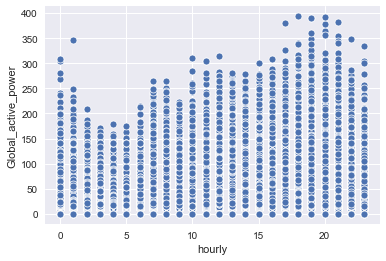

In [61]:
import seaborn as sns
sns.scatterplot(x='hourly' ,y ='Global_active_power', data = df_global)

In [63]:
df_global_pivot= df_global.pivot(columns ='hourly')
df_global_pivot.dropna(inplace =True)

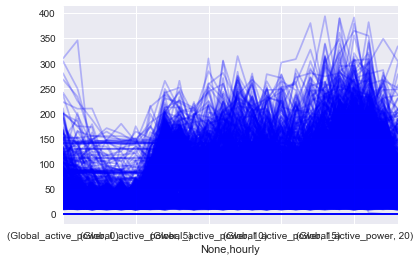

In [64]:
df_global_pivot.T.plot(legend =False, color ='blue', alpha = 0.25);

In [66]:
x_array = df_global_pivot.values.copy()
x_array.shape

(1456, 24)

In [67]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x_array)

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [69]:
sillhoute_scores = []
n_cluster_list = np.arange(2,31)
n_cluster_list

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [70]:
for n in n_cluster_list:
    kmeans = KMeans(n_clusters=n)
    cluster_found = kmeans.fit_predict(x_scaled)
    sillhoute_scores.append(silhouette_score(x_scaled, kmeans.labels_))

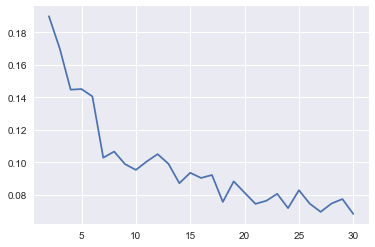

In [71]:
plt.plot(n_cluster_list, sillhoute_scores)

In [72]:
np.array(sillhoute_scores).max()
np.array(sillhoute_scores).argmax()+2

2

In [73]:
kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(x_scaled)

In [74]:
df_global_pivot['km3'] = kmeans.labels_

In [77]:
df_global_pivot

Global_active_power                                               \
hourly                  0        1        2        3        4        5    
km3                                                                       
2                  112.948  200.964   95.236   99.732  132.946  119.804   
0                   16.582   18.798   17.068   18.596   61.580   17.610   
0                   50.228   21.182   19.634   18.498   19.670   18.400   
0                   27.590   15.520   47.062   18.602   17.340   15.762   
0                   92.152   83.878   76.494   18.156   14.804   17.442   
..                     ...      ...      ...      ...      ...      ...   
1                   66.032   23.094   28.124   20.464   21.752   22.328   
1                   37.004   56.490   16.658   16.208   18.534   17.316   
2                  114.978  105.758  136.446  134.158   85.730   17.988   
0                   23.672   23.858   28.118   20.248   20.030   27.068   
0                   52.860   16.036   21.038   19.224   16.752   17.376   

                                           ...                             \
hourly      6        7        8        9   ...       14       15       16   
km3                                        ...                              
2       78.198   97.202  113.434  152.944  ...  125.558  179.124  199.562   
0       36.600  147.026  124.928   97.760  ...  103.982  107.058  116.958   
0       47.780  107.138  232.742   97.066  ...   18.128   25.282   82.328   
0       17.016   91.598  175.056   83.132  ...   77.694   16.868   28.106   
0       17.740   76.828   93.782  154.548  ...   61.434   18.444   81.604   
..         ...      ...      ...      ...  ...      ...      ...      ...   
1       32.670   50.192   56.654   36.144  ...   31.298   32.576   21.182   
1       18.692   16.822   15.592   18.416  ...   17.232   18.906   16.194   
2       16.176   20.766   21.768   26.070  ...   98.592   92.924   60.996   
0       67.810  151.192  103.256  105.116  ...   27.484   35.294   24.960   
0       39.382  161.640  142.554   93.328  ...   79.256  107.446   81.700   

                                                                       
hourly       17       18       19       20       21       22       23  
km3                                                                    
2       204.406  221.826  174.504  201.690  182.446   91.080   26.264  
0       129.294  144.152  156.870  183.034  130.184  104.328   92.836  
0       126.690  132.282  110.526  176.432   86.572   43.200   23.022  
0        34.410  170.210  194.918  214.528  218.764  183.538  142.906  
0       105.158  146.598  131.828  146.242   58.936   16.816   16.226  
..          ...      ...      ...      ...      ...      ...      ...  
1        69.642   41.306   32.172   90.244  119.854  111.814   38.156  
1        18.228   14.764   18.658   18.328   18.772   15.686   15.622  
2        28.956   25.510   18.460   83.844   92.630   92.246   77.370  
0        24.616  126.764  129.388  114.612   78.514   77.358   41.562  
0       147.366  136.852  143.518  105.200   66.894   19.232   38.392  

[1456 rows x 24 columns]

In [ ]:
df_global_pivot.set_index('km3', inplace =True)

In [79]:
df_global_pivot.xs(0).T.droplevel(0, axis=0)
#.droplevel(0, axis=0) method drops the global_active_power index level in the index 

km3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hourly,,,,,,,,,,,,,,,,,,,,,
0,16.582,50.228,27.590,92.152,16.016,59.974,28.978,61.112,17.682,16.712,...,21.910,21.502,17.658,17.554,19.296,83.868,19.584,58.472,23.672,52.860
1,18.798,21.182,15.520,83.878,16.320,72.406,29.608,16.664,18.918,19.150,...,17.546,15.918,16.860,18.886,18.246,21.354,59.170,25.414,23.858,16.036
2,17.068,19.634,47.062,76.494,16.058,26.280,28.770,18.970,16.766,17.456,...,16.942,30.126,16.406,20.490,59.190,18.116,30.088,48.152,28.118,21.038
3,18.596,18.498,18.602,18.156,16.432,35.398,26.648,17.928,18.346,17.766,...,16.470,45.074,17.902,22.224,19.202,17.896,21.054,19.114,20.248,19.224
4,61.580,19.670,17.340,14.804,15.856,34.720,28.442,18.606,18.056,18.266,...,21.610,19.218,18.842,21.232,22.474,18.430,18.894,20.546,20.030,16.752
5,17.610,18.400,15.762,17.442,48.410,37.206,62.192,17.364,16.670,40.284,...,16.812,17.064,16.954,17.376,17.814,18.782,19.186,19.404,27.068,17.376
6,36.600,47.780,17.016,17.740,28.778,15.844,28.464,17.554,54.406,133.166,...,38.144,49.738,60.526,68.898,94.156,22.384,56.698,36.382,67.810,39.382
7,147.026,107.138,91.598,76.828,103.392,40.608,122.992,62.600,15.394,183.496,...,152.916,171.014,173.036,136.324,176.376,121.006,147.680,101.488,151.192,161.640
8,124.928,232.742,175.056,93.782,164.664,156.666,129.884,152.144,91.004,197.840,...,102.244,93.250,119.958,139.730,95.372,142.440,126.282,102.800,103.256,142.554


''

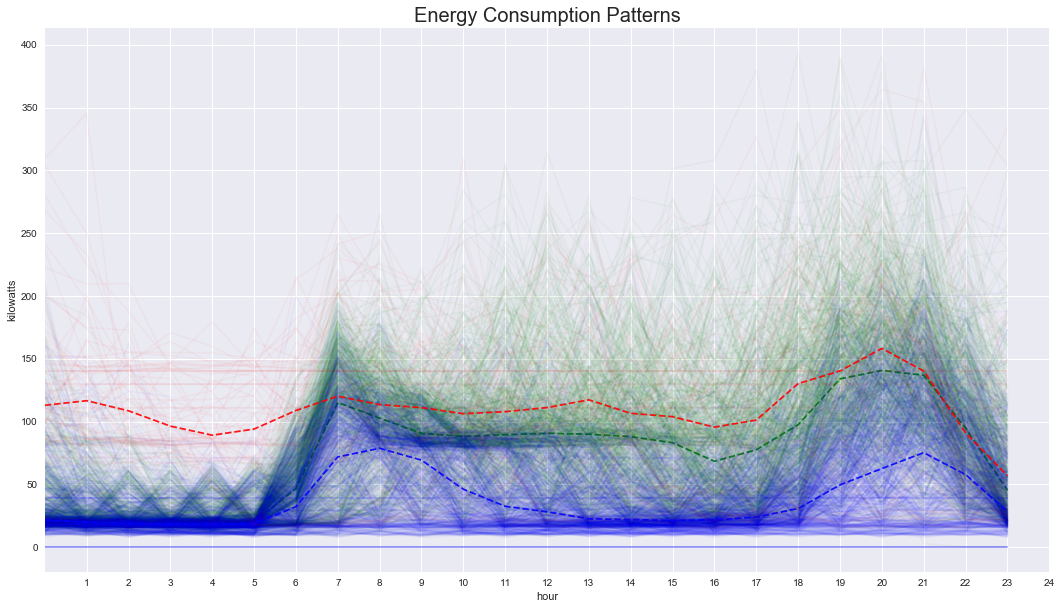

In [87]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
df_global_pivot.xs(0).T.droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.03, color='green')
df_global_pivot.xs(0).median().droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.9, color='green', ls ='--')
df_global_pivot.xs(1).T.droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.03, color='blue')
df_global_pivot.xs(1).median().droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.9, color='blue', ls ='--')
df_global_pivot.xs(2).T.droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.03, color='red')
df_global_pivot.xs(2).median().droplevel(0, axis=0).plot(ax=ax, legend=False, alpha=0.9, color='red', ls ='--')
ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.set_title("Energy Consumption Patterns", fontsize =20)
plt.savefig(r"D:/Hassan/PYTHON/Energy Analytics/Important Notes/EnergyPatterns.png")
;

In [81]:
from sklearn.manifold import TSNE
import matplotlib.colors

tsne = TSNE()
results_tsne = tsne.fit_transform(x_scaled)

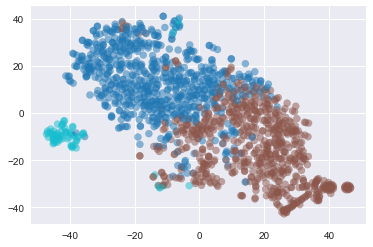

In [82]:
cmap = plt.get_cmap('tab10')
plt.scatter(results_tsne[:,0], results_tsne[:,1], c= df_global_pivot.index, cmap =cmap, alpha =0.5)

### Clusters are together, thus validating the quality of the model
